In [1]:

import cmasher as cmr
import random
import numpy as np

import matplotlib.pyplot as plt
import os
import array as arr
import time

import matplotlib
from scipy.interpolate import RectBivariateSpline
import pandas as pd
import matplotlib.colors as mcolors
import os
from scipy import stats
from matplotlib.colors import LogNorm
import matplotlib.colors as colors
from os.path import expanduser
home = expanduser("~")
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import matplotlib.gridspec
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
#from PIL import Image
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

plt.style.use('dark_background')


In [2]:
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_csv ="/mnt/usb-TOSHIBA_EXTERNAL_USB_20220124010088F-0:0-part2/snapshots/"
path_acceleration =  "/home/bego/GARROTXA/acceleration/"
#path_disco = "/media/temp/bego/disco/"
datos_edades=pd.read_csv(path_datos + "edades.csv", sep = ",",index_col = 0)

In [88]:
def fourier(X,Y, peso=None, maximo=40, minimo=0, paso = 1):
#    paso = 1
   # nbins = 2
    nbins = np.around((maximo-minimo)/paso).astype(int)

    #print(nbins)
    AA =  np.zeros((7,nbins))
    armangle =  np.zeros((7,nbins))
    steparm = (maximo-minimo)/nbins
    radarm = np.arange(minimo,maximo + steparm, steparm )
    nparticles =  np.zeros((nbins))
    A = [0,0,0,0,0,0,0]
    B = [0,0,0,0,0,0,0]
    rcenter=(radarm[:-1] + radarm[1:]) / 2
    dd = np.sqrt(X**2 + Y**2)
    indr=np.digitize(dd,radarm)-1

    for m in range(0,6):
        for i in range(nbins):
            X_i=X[indr==i] 
            Y_i=Y[indr==i]
            A[m] = 0
            B[m] = 0
            a = []
            b = []
            a = np.arctan2(Y_i, X_i)
            b= np.arcsin(Y_i/np.sqrt(Y_i**2 + X_i**2))
            if peso is None:
                if m == 0:
                    A[m] = np.sum(np.cos(m*a))
                    B[m] = np.sum(np.sin(m*a))
                else :
                    A[m] = np.sum(2*np.cos(m*a))
                    B[m] = np.sum(2*np.sin(m*a))

            else:
                peso_i=peso[indr==i]
                if m ==0:
                    A[m] = np.sum(peso_i*np.cos(m*a))
                    B[m] = np.sum(peso_i*np.sin(m*a))
                else :
                    A[m] = np.sum(2*peso_i*np.cos(m*a))
                    B[m] = np.sum(2*peso_i*np.sin(m*a))
            
            AA[m,i] = np.sqrt(A[m]**2+ B[m]**2)
            if m > 0:
                armangle[m,i] = np.arctan2(B[m],A[m])
            elif m == 0:
                armangle[m,i] = 0
                nparticles[i]= len(a)



    d = {"Bins":range(1, nbins+1) , "R":rcenter,
         "nparticles":nparticles,
         "Amp0":AA[0,:], "Ang0":armangle[0,:],
         "Amp1":AA[1,:], "Ang1":armangle[1,:],
         "Amp2":AA[2,:], "Ang2":armangle[2,:]}

    df_modos = pd.DataFrame(data=d)

    return df_modos

4.117248263244694e-14
-1.061509062073862e-12


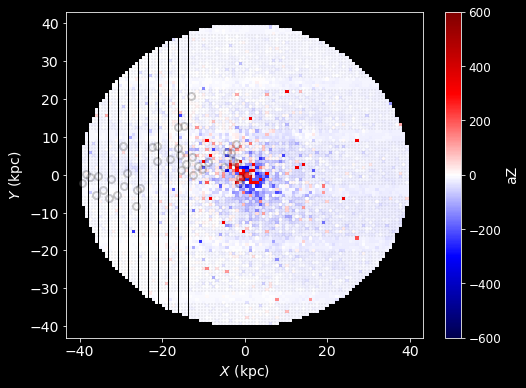

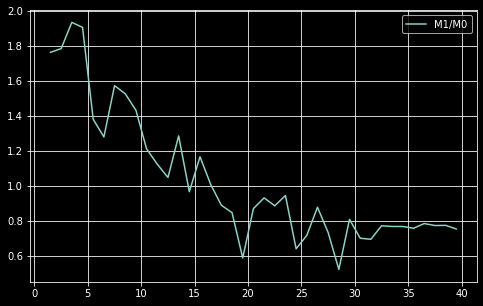

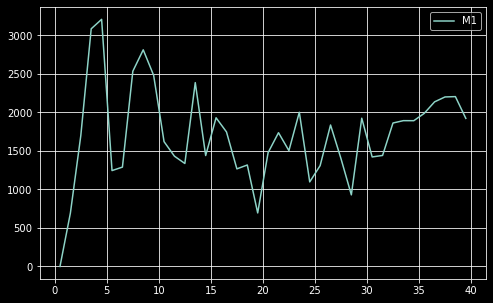

In [153]:
name = 798
radio = 40
mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_{name}_ytRS_40.csv",sep = ",",dtype=np.float32)
#df["Rsph"] = np.sqrt(df["X"]**2 +df["Y"]**2 +df["Z"]**2 )
#df = df[(df["Rsph"])<radio]
#disco = pd.read_csv(path_disco + "Stars_disco_%s.csv" %name)
edades = [0, 14000]
rango=600
size = 5
ancho = 45
seconds_to_Myr = 3.15576e+16
print(np.max(mesh_dm["az"]))
print(np.min(mesh_dm["az"]))
limite = 1e-14
for t,i in enumerate(mesh_dm["az"]):
    if mesh_dm["az"][t]>limite:
        mesh_dm["az"][t]=limite
    elif mesh_dm["az"][t]< -limite:
        mesh_dm["az"][t]=limite
        
        
    
    
    
res =  fourier(mesh_dm["X"],mesh_dm["Y"], peso =mesh_dm["az"]*seconds_to_Myr)
#res =  fourier(disco["X"],disco["Y"])
rangex=[-radio,radio]
rangey=[-radio,radio]
binsx=150
binsy=150

x = res["R"]*np.cos(res["Ang1"])
y = res["R"]*np.sin(res["Ang1"])

aspect=(rangex[1]-rangex[0])/(rangey[1]-rangey[0])
deltax=(rangex[1]-rangex[0])/binsx
deltay=(rangey[1]-rangey[0])/binsy

fig=plt.figure(figsize = (8,6))
ax1 = plt.subplot2grid((1, 1), (0, 0))

#stat0=stats.binned_statistic_2d(df['X'],df['Y'],df['Z'], statistic='mean', bins=(binsx,binsy), range=[rangex,rangey])
az = ax1.scatter(mesh_dm.X, mesh_dm.Y, marker='s', c=mesh_dm.az*seconds_to_Myr, 
                    cmap= "seismic", s = size, vmin =-rango, vmax = rango)

#im=np.flip(stat0.statistic.T*1.,0)
#im1=ax1.imshow(im,cmap='PuOr', extent=[rangex[0],rangex[1],rangey[0],rangey[1]]
#              ,aspect=aspect,vmin=-radio/5,vmax=radio/5)
#plt.scatter(x, y, c="black", marker = "x", s = 200)
plt.plot(x, y,marker = "o",  ms=7, markerfacecolor="white",
         markeredgecolor='black', markeredgewidth=2, lw = 0, alpha=0.2)
cb = fig.colorbar(az,ax=ax1)
cb.ax.tick_params(labelsize=12)
cb.set_label(label='aZ', size = 14)

ax1.set_xlabel('$X$ (kpc)', fontsize = 14)
ax1.set_ylabel('$Y$ (kpc)', fontsize = 14)

ax1.tick_params(labelsize = 14)
#plt.title("%.2f Gyr" %lb, fontsize = 20)

fig = plt.figure(figsize=(8,5))
#plt.title("%.2f Gyr" %lb, fontsize = 20)
plt.plot(res["R"], np.log10((res["Amp1"]/res["nparticles"])), label ="M1/M0")
#plt.plot(res["R"], np.log10((res["Amp2"]/res["nparticles"])*seconds_to_Myr), label ="M2/M0")

plt.legend()
plt.grid()


plt.show()

fig = plt.figure(figsize=(8,5))
#plt.title("%.2f Gyr" %lb, fontsize = 20)
plt.plot(res["R"], res["Amp1"], label ="M1")
#plt.plot(res["R"], res["Amp2"], label ="M2")
#plt.plot(res["R"], res["Amp0"], label ="M0")

plt.legend()
plt.grid()


plt.show()


#fig = plt.figure(figsize=(8,5))
#plt.title("%.2f Gyr" %lb, fontsize = 20)
#plt.plot(res["R"], res["Amp1"]/np.median(res["Amp0"][1:]), label ="M1/mean(M0)")
#plt.plot(res["R"], res["Amp2"]/np.median(res["Amp0"][1:]), label ="M2/mean(M0)")
#plt.plot(res["R"], res["Amp0"]/np.median(res["Amp0"][1:]), label ="M0")

#plt.legend()
#plt.grid()


#plt.show()

In [154]:
name = 916
DM_r = pd.read_csv(path_csv + f"{name}_dm_Rvir.csv", sep = ",")
print(DM_r)


                 ID        X       VX        Y       VY        Z       VZ  \
0           16079.0    9.494   61.735  -22.556  -29.354  177.971 -146.098   
1           16255.0   17.906 -111.228  -25.677   28.493  -85.122 -195.366   
2           16270.0   13.070   60.190  -27.521  -33.265  170.711 -149.697   
3           16271.0   39.060   54.903  -26.789  -55.342   88.705 -201.888   
4           16286.0   -5.320   45.023   14.312  -27.824  182.406 -124.812   
...             ...      ...      ...      ...      ...      ...      ...   
6613640  16961808.0    0.176  163.482   23.825  142.349   72.320   12.187   
6613641  16961872.0  -36.416  141.517  -10.826  157.288   60.032   83.627   
6613642  16961928.0  130.714   73.830  107.413   19.812   32.242  -85.369   
6613643  16961984.0   55.312  131.970   69.360   80.036   75.226  -55.257   
6613644  16961992.0 -101.986    4.440 -133.210   55.873  -82.227  128.678   

           X_re    VX_re     Y_re    VY_re        Mass  
0       -21.701  -

In [135]:
DM_r = pd.read_csv(path_csv + f"{name}_dm_Rvir.csv", sep = ",")
DM = DM_r[(np.abs(DM_r["Z"])>0.001)]
len(DM)

6612971

In [157]:
DM = pd.read_csv(path_csv + f"{name}_dm_Rvir.csv", sep = ",")
DM["R"] = np.sqrt(DM["X"] +DM["Y"]**2+ DM["Z"]**2)
DM = DM[DM["R"]<25]
print(np.mean(DM["Mass"]))

93491.24758440538


In [159]:
G= 1.3273e11
M = 93491.24
a = 1e-14
z = np.sqrt(M*G/a)
print(z/3.086e16)


0.03609724735620709


In [155]:
DM = DM_r[((DM_r["R"])<25)]

KeyError: 'R'

In [100]:
fourier_dm = pd.read_csv("prueba_dm_fourier.csv", sep = ",")

In [105]:
fourier_dm
#arr_z = np.log10((np.array(fourier_dm["amp1"]/fourier_dm["nparticles"]))*seconds_to_Myr)
arr_z = np.array(fourier_dm["amp1"])
amp = arr_z.reshape(-1, nbins)
arr_z = np.array(fourier_dm[f"phase1"])
phase = arr_z.reshape(-1, nbins)
#data["lookbacktime"][::nbins]
rcenters= fourier_dm["Rcenters"][0:nbins]

(2.0, 40.0)

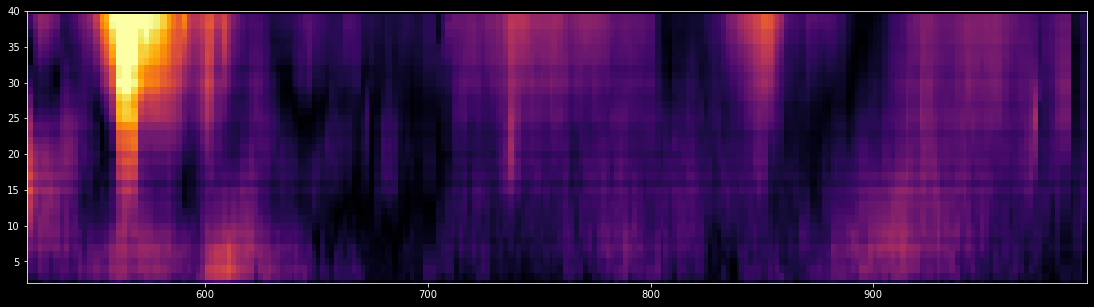

In [115]:
fig, ax = plt.subplots(nrows=1,ncols =1,sharex = True,sharey = True,  figsize=(19,5))
im0 = ax.pcolormesh(snapshots_analysis,rcenters,amp.T*seconds_to_Myr, vmin = 100, vmax =8000, cmap = "inferno")
#ax.set_xlim(910, 930)
plt.ylim(2,40)

In [109]:
amp.T

array([[2.58279594e-15, 2.92675536e-15, 2.20194116e-15, ...,
        5.55641097e-15, 1.43515303e-15, 7.37960707e-16],
       [8.99047189e-15, 8.73858559e-15, 1.25334186e-14, ...,
        1.16382024e-14, 6.23025423e-15, 8.74997701e-15],
       [3.52945772e-14, 3.29603799e-14, 5.08973790e-14, ...,
        2.68789602e-14, 1.22870715e-14, 1.58272451e-14],
       ...,
       [4.36715260e-14, 7.44810897e-14, 9.76101688e-14, ...,
        3.36033403e-14, 3.57026895e-14, 3.56765462e-14],
       [5.15547559e-14, 8.03168949e-14, 1.00016551e-13, ...,
        3.55519797e-14, 3.57974352e-14, 3.73686329e-14],
       [5.13765806e-14, 7.50360799e-14, 9.06207531e-14, ...,
        3.45757899e-14, 3.37261541e-14, 3.51218206e-14]])

In [99]:
snapshots_analysis = [520,523,525, 527,530,532,535, 537,539,541,
543, 545,547, 550, 553, 555,557, 
560, 563, 565, 567,570,573, 575, 577, 580,
583, 585,587,590, 592,594,
596,598,600,
602, 604, 608, 610, 612, 614, 616, 618, 620, 622, 624, 626, 
629, 630, 632, 634, 636, 639, 640, 642, 644, 646, 648, 650, 652, 654, 656, 658, 660, 662, 
664, 666, 668,670, 672, 674, 676, 679, 681, 682, 684, 687, 689,
690, 692, 694, 698, 704,  706, 708,711, 712,714, 716,
718, 720, 722, 724, 726, 728, 731, 732, 734, 736, 739, 740, 742, 744, 746, 748, 751,752,
755, 756, 758, 761,763, 764, 766, 768, 770, 772, 774, 776, 778, 780, 
782, 784, 786, 788, 790, 792, 794, 797, 798, 802, 805, 806, 808, 810, 812, 814, 816,
818, 820, 822, 824, 826, 828, 830, 832, 834, 836, 839, 840, 842, 844, 846, 848, 850,
853, 855, 856, 858, 860, 862, 864, 867, 870, 872, 875, 877, 879, 881, 883, 884, 888,
890, 892, 894, 898, 900, 902, 904, 907, 908, 910, 912, 915, 916, 918, 921, 922, 924, 927, 929, 
930, 932, 934, 937,
939, 941,942, 944, 946, 948, 950, 952, 954,956, 
958, 961, 963, 965, 966, 968, 970, 972, 974, 976, 979,
980, 982, 984, 989, 990, 993, 994, 996]
nbins = 40
datos = np.zeros((len(snapshots_analysis)*nbins, 8))
index = 0
for t,name in enumerate(snapshots_analysis):
    print(name)
    mesh_dm = pd.read_csv(path_acceleration + f"mesh_aceleracion_dm_{name}_ytRS_40_soft.csv",sep = ",")
    lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
   # res =  fourier(df["X"],df["Y"], peso =df["az"])
    res =fourier(mesh_dm["X"],mesh_dm["Y"],peso=mesh_dm["az"])
    for i in range(nbins):
             #   print([snapshots_analysis[t],lookback[t], Rcenters[i],npart[i]] + list(amplitudes[:,i]) + list(phases[:,i]))
            datos[index] = [snapshots_analysis[t],lb,res["R"][i],res["nparticles"][i],res["Amp1"][i],res["Amp2"][i],res["Ang1"][i],res["Ang2"][i]]
            index = index + 1
            
    
column_names = ['snapshot_t','lookbacktime','Rcenters','nparticles', 'amp1', 'amp2', 'phase1', 'phase2']


datos = pd.DataFrame(datos, columns=column_names)


datos.to_csv( 'prueba_dm_fourier.csv', sep = ',', index = False)


520
523
525
527
530
532
535
537
539
541
543
545
547
550
553
555
557
560
563
565
567
570
573
575
577
580
583
585
587
590
592
594
596
598
600
602
604
608
610
612
614
616
618
620
622
624
626
629
630
632
634
636
639
640
642
644
646
648
650
652
654
656
658
660
662
664
666
668
670
672
674
676
679
681
682
684
687
689
690
692
694
698
704
706
708
711
712
714
716
718
720
722
724
726
728
731
732
734
736
739
740
742
744
746
748
751
752
755
756
758
761
763
764
766
768
770
772
774
776
778
780
782
784
786
788
790
792
794
797
798
802
805
806
808
810
812
814
816
818
820
822
824
826
828
830
832
834
836
839
840
842
844
846
848
850
853
855
856
858
860
862
864
867
870
872
875
877
879
881
883
884
888
890
892
894
898
900
902
904
907
908
910
912
915
916
918
921
922
924
927
929
930
932
934
937
939
941
942
944
946
948
950
952
954
956
958
961
963
965
966
968
970
972
974
976
979
980
982
984
989
990
993
994
996


In [21]:
res

,Bins,R,nparticles,Amp0,Ang0,Amp1,Ang1,Amp2,Ang2,Amp3,Ang3,Amp4,Ang4,Amp5,Ang5
0,1,0.0,4.0,4.0,0.0,7.603308e-14,2.669368,8.040940e-14,-1.570796,7.603308e-14,0.472225,1.379489e-13,3.141593,7.603308e-14,-0.472225
1,2,1.0,12.0,12.0,0.0,3.151896e-13,-1.425911,3.094201e-13,-0.644087,3.372858e-13,0.324543,3.028496e-13,1.768763,3.443862e-13,-2.864024
2,3,2.0,28.0,28.0,0.0,1.837024e-13,2.651643,6.173361e-14,-0.915135,9.440498e-14,-1.374442,6.988961e-14,3.022156,7.435815e-14,-1.530977
3,4,3.0,36.0,36.0,0.0,5.858111e-14,2.739112,5.566435e-14,0.595586,2.570143e-14,-2.324743,9.101215e-14,-2.874670,4.049731e-14,-1.227001
4,5,4.0,40.0,40.0,0.0,1.161758e-13,1.898804,9.549032e-14,-3.125424,5.896952e-14,0.190451,1.253465e-13,2.911465,9.311347e-14,-0.782324
5,6,5.0,52.0,52.0,0.0,4.460651e-14,2.002678,5.239543e-14,2.440782,5.536599e-14,-0.209052,2.222881e-14,-2.343011,6.938626e-14,-2.145687
6,7,6.0,68.0,68.0,0.0,1.227355e-13,2.698927,5.249545e-14,2.741731,2.777913e-14,-1.180886,2.928041e-14,2.711198,1.240760e-14,-1.345321
7,8,7.0,68.0,68.0,0.0,6.672119e-14,2.453479,4.833335e-14,2.574199,4.609255e-14,-0.393122,3.202476e-14,2.403981,5.091462e-14,-0.847253
8,9,8.0,84.0,84.0,0.0,9.298951e-14,2.376574,2.744195e-14,2.550221,7.229147e-14,0.111639,2.639520e-14,2.511655,2.601237e-14,-1.549617
9,10,9.0,92.0,92.0,0.0,6.377196e-14,2.162584,4.652944e-14,2.497014,3.554827e-14,-1.447639,4.475338e-14,0.262249,1.534886e-14,0.716150


In [23]:
res["Ang1"][1] 

-1.4259113757525097

In [5]:
G= 1.3273e11
kpc_to_km= 3.086e16

In [4]:
name = 900
comp = "dm"
DM_r = pd.read_csv(path_csv + f"{name}_{comp}_Rvir.csv", sep = ",")

In [8]:
x_sat0 = np.array(DM_r["X"], dtype = np.float32)
y_sat0 = np.array(DM_r["Y"], dtype = np.float32)
z_sat0 = np.array(DM_r["Z"], dtype = np.float32)
mass_sat0 = np.array(DM_r["Mass"], dtype = np.float32)
R = np.sqrt(x_sat0**2 + y_sat0**2 +z_sat0**2)
ax_0 = np.sum(G*mass_sat0*x_sat0/((R**3)*(kpc_to_km**2)))
ay_0 = np.sum(G*mass_sat0*y_sat0/((R**3)*(kpc_to_km**2)))
az_0 = np.sum(G*mass_sat0*z_sat0/((R**3)*(kpc_to_km**2)))

In [10]:
az_0

-3.6241575e-14

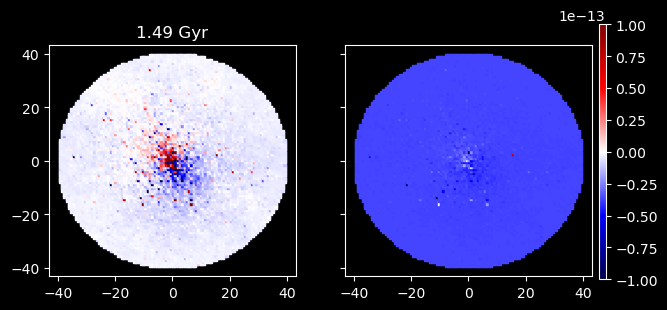

In [16]:
rango_z=1e-14
rango_z_tidal = 1e-13
size = 5
ancho = 40
name = 900
ac_dm= pd.read_csv(path_acceleration +f"mesh_aceleracion_dm_{name}_ytRS_40.csv", sep = ",", index_col = 0)
#ac_dm_tidal= pd.read_csv(path_acceleration +f"mesh_aceleracion_dm_{name}_ytRS_40_prueba_tidal.csv", sep = ",", index_col = 0)

fig, ax = plt.subplots(1, 2, sharex=False, sharey=True,figsize = (7,3))

az = ax[0].scatter(ac_dm.X,ac_dm.Y, marker='s', c=ac_dm.az, 
               cmap= "seismic", s = size, vmin =-rango_z, vmax = rango_z)

lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
ax[0].set_title(f"{lb:.2f} Gyr")
az = ax[1].scatter(ac_dm.X,ac_dm.Y, marker='s', c=ac_dm.az + az_0, 
               cmap= "seismic", s = size, vmin =-rango_z_tidal, vmax = rango_z_tidal)


cbar_aphi_ax = fig.add_axes([0.91,0.1, 0.01,0.85 ])
fig.colorbar(az,cbar_aphi_ax )

#plt.savefig(f"acceleration_figs/sum_accelerations_{name}.png",  format='png', dpi=150, bbox_inches='tight')
#plt.close()


#ac_nodisk = 
plt.style.use('dark_background')

In [17]:
az_puro = ac_dm.az

In [25]:
len(DM_r)

6563547

In [35]:
az_puro = ac_dm.az
x = np.array(DM_r["X"], dtype = np.float64)
y = np.array(DM_r["Y"], dtype = np.float64)
z = np.array(DM_r["Z"], dtype = np.float64)
mass = np.array(DM_r["Mass"], dtype = np.float64)
for i in range(len(DM_r)):
    if np.abs(z[i]) < 0.05:
        if z[i]> 0:
            z[i] = 0.05
        elif z[i]<0:
            z[i] = -0.05
    R = np.sqrt(x[i]**2 + y[i]**2 +z[i]**2)
    az_0 = G*mass[i]*z[i]/((R**3)*(kpc_to_km**2))
    az_puro = az_puro - az_0
    if i  % 100000 == 0:
        print("%0.2f " % i)
    
    

0.00 
100000.00 
200000.00 
300000.00 
400000.00 
500000.00 
600000.00 
700000.00 
800000.00 
900000.00 
1000000.00 
1100000.00 
1200000.00 
1300000.00 
1400000.00 
1500000.00 
1600000.00 
1700000.00 
1800000.00 
1900000.00 
2000000.00 
2100000.00 
2200000.00 
2300000.00 
2400000.00 
2500000.00 
2600000.00 
2700000.00 
2800000.00 
2900000.00 
3000000.00 
3100000.00 
3200000.00 
3300000.00 
3400000.00 
3500000.00 
3600000.00 
3700000.00 
3800000.00 
3900000.00 
4000000.00 
4100000.00 
4200000.00 
4300000.00 
4400000.00 
4500000.00 
4600000.00 
4700000.00 
4800000.00 
4900000.00 
5000000.00 
5100000.00 
5200000.00 
5300000.00 
5400000.00 
5500000.00 
5600000.00 
5700000.00 
5800000.00 
5900000.00 
6000000.00 
6100000.00 
6200000.00 
6300000.00 
6400000.00 
6500000.00 


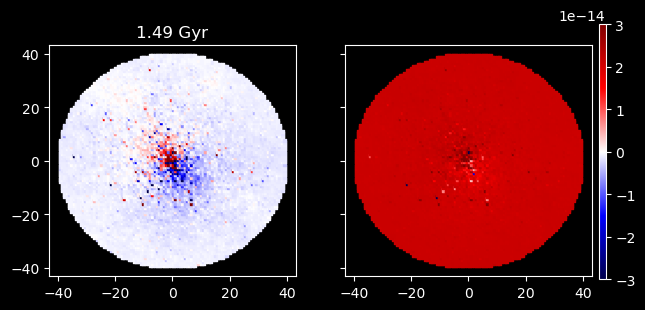

In [36]:
rango_z=1e-14
rango_z_tidal = 3e-14
size = 5
ancho = 40
name = 900
ac_dm= pd.read_csv(path_acceleration +f"mesh_aceleracion_dm_{name}_ytRS_40.csv", sep = ",", index_col = 0)
#ac_dm_tidal= pd.read_csv(path_acceleration +f"mesh_aceleracion_dm_{name}_ytRS_40_prueba_tidal.csv", sep = ",", index_col = 0)

fig, ax = plt.subplots(1, 2, sharex=False, sharey=True,figsize = (7,3))

az = ax[0].scatter(ac_dm.X,ac_dm.Y, marker='s', c=ac_dm.az, 
               cmap= "seismic", s = size, vmin =-rango_z, vmax = rango_z)

lb = datos_edades.loc[datos_edades['Snapshot'] == name, 'Lookback'].iloc[0]
ax[0].set_title(f"{lb:.2f} Gyr")
az = ax[1].scatter(ac_dm.X,ac_dm.Y, marker='s', c=az_puro, 
               cmap= "seismic", s = size, vmin =-rango_z_tidal, vmax = rango_z_tidal)


cbar_aphi_ax = fig.add_axes([0.91,0.1, 0.01,0.85 ])
fig.colorbar(az,cbar_aphi_ax )

#plt.savefig(f"acceleration_figs/sum_accelerations_{name}.png",  format='png', dpi=150, bbox_inches='tight')
#plt.close()


#ac_nodisk = 
plt.style.use('dark_background')

In [34]:
np.max(az_puro)

1.321014196159913e-13